In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy.linalg as la

from tqdm import tqdm_notebook
import scipy.stats as sstats
import math

import seaborn as sns
from sklearn import datasets
from scipy.stats import mode

from sklearn import (decomposition, ensemble, manifold, random_projection)

from sklearn.decomposition import PCA
from sklearn.model_selection import KFold

# Zadanie 1. (4 punkty)

## a) 
Utwórz zestaw danych X składający się z 1000 wektorów dwuwymiarowych xi = (x1i,x2i)^T, dla i = 1, 2, …, 1000, wygenerowanych losowo przy użyciu dwuwymiarowego rozkładu normalnego o średniej [3, 5] i macierzy kowariancji [12, 3; 3, 1].

In [6]:
N = 1000
X = np.random.randn(2,N)
A = la.cholesky([[12, 3],[3, 1]])
X = np.dot(A,X) + np.array([[3],[5]])
X

array([[ 3.07039371,  4.03746808,  2.493271  , ...,  6.57461932,
        -3.59862234,  3.37873238],
       [ 5.75424852,  5.21129881,  5.2023598 , ...,  6.51686086,
         2.94685689,  5.47999855]])

In [7]:
np.mean(X[0,:])

2.9870883826575327

In [8]:
np.mean(X[1,:])

5.011043799476649

In [9]:
print(np.cov(X))

[[12.48027574  3.24153985]
 [ 3.24153985  1.09421677]]


## b) 
Ustandaryzuj dane, tak aby średnia dla każdego z wymiarów wynosiła 0, a wariancja 1. Ustandaryzowane dane oznaczmy przez X(0).

In [10]:
def standardize(X):
    m = np.mean(X,1).reshape(-1,1)
    s = np.std(X,1).reshape(-1,1)
    return (X - m) / s

In [11]:
X0 = standardize(X)
X0

array([[ 0.02359272,  0.29747569, -0.13985292, ...,  1.01601664,
        -1.86512445,  0.11091662],
       [ 0.71084355,  0.19153536,  0.18298558, ...,  1.44024968,
        -1.97430658,  0.44853518]])

In [12]:
np.mean(X0[0,:]),np.mean(X0[1,:])

(-6.927791673660977e-17, -1.4921397450962105e-16)

In [13]:
np.std(X0[0,:]),np.std(X0[1,:])

(0.9999999999999999, 1.0)

In [14]:
print(np.cov(X0))

[[1.001001   0.87805577]
 [0.87805577 1.001001  ]]


## c)
Policz macierz kowariancji S ustandaryzowanego zestawu danych X(0).

In [10]:
S = np.cov(X0)
print(np.cov(X))
print()
print(S)

[[12.59089358  3.09370398]
 [ 3.09370398  0.99358051]]

[[1.001001   0.87555505]
 [0.87555505 1.001001  ]]


## d) 
Wyznacz wartości własne λ1 i λ2 oraz odpowiadające im wektory własne v1 i v2 macierzy kowariancji S. Dla ustalenia notacji, wartości własne porządkujemy malejąco, tzn. λ1 > λ2.

In [11]:
W,V = la.eig(S)
W,V

(array([1.87655605, 0.12544595]), array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

## e)
Wyznacz składowe główne zestawu danych, tzn. dla każdego punktu danych xi(0) wyznacz punkt yi = (1/sqrt(λ1) v1T xi(0), 1/sqrt(λ2) v2T xi(0))T. Odpowiada to zrzutowaniu punktu xi(0) na osie nowego układu współrzędnych wyznaczonego przez wektory własne macierzy S i przeskalowaniu przez pierwiastki z wartości własnych.

In [12]:
X_pc = (1./np.sqrt(W).reshape(-1,1)) *  np.dot(V.T,X0)

## f) 
Zrób rysunki pokazujące oryginalny zbiór danych (punkty xi), zbiór danych po standaryzacji (punkty xi(0)) i zbioru danych po przekształceniu PCA (punkty yi). Na rysunkach z punktami xi i xi(0) narysuj proste zawierające osie główne elipsy wyznaczanej przez punkty danych.

In [13]:
X_mean = np.mean(X,1)
X_std = np.std(X,1)
X_mean0 = np.mean(X0,1)
X_std0 = np.std(X0,1)

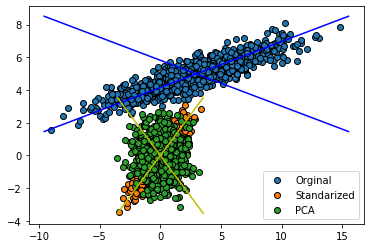

In [14]:
plt.scatter(X[0],X[1],label = 'Orginal',edgecolor = 'black')
plt.plot([X_mean[0] - 5 * V[0, 0] * X_std[0], X_mean[0] + 5 * V[0,0] * X_std[0]], [X_mean[1] - 5 * V[1,0] * X_std[1], X_mean[1] + 5 * V[1,0] * X_std[1]],c = 'b')
plt.plot([X_mean[0] - 5 * V[0, 1] * X_std[0], X_mean[0] + 5 * V[0,1] * X_std[0]], [X_mean[1] - 5 * V[1,1] * X_std[1], X_mean[1] + 5 * V[1,1] * X_std[1]],c='b')
plt.scatter(X0[0],X0[1],label = 'Standarized',edgecolor = 'black')
plt.plot([X_mean0[0] - 5 * V[0, 0] * X_std0[0], X_mean0[0] + 5 * V[0,0] * X_std0[0]], [X_mean0[1] - 5 * V[1,0] * X_std0[1], X_mean0[1] + 5 * V[1,0] * X_std0[1]],c = 'y')
plt.plot([X_mean0[0] - 5 * V[0, 1] * X_std0[0], X_mean0[0] + 5 * V[0,1] * X_std0[0]], [X_mean0[1] - 5 * V[1,1] * X_std0[1], X_mean0[1] + 5 * V[1,1] * X_std0[1]],c='y')
plt.scatter(X_pc[0],X_pc[1],label = 'PCA',edgecolor = 'black')
plt.legend(loc = 'lower right')

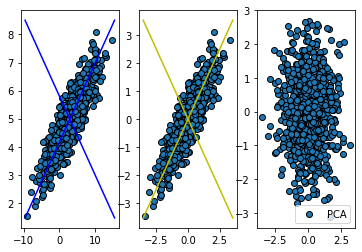

In [15]:
fig, ax = plt.subplots(1,3)
ax[0].scatter(X[0],X[1],label = 'Orginal',edgecolor = 'black')
ax[0].plot([X_mean[0] - 5 * V[0, 0] * X_std[0], X_mean[0] + 5 * V[0,0] * X_std[0]], [X_mean[1] - 5 * V[1,0] * X_std[1], X_mean[1] + 5 * V[1,0] * X_std[1]],c = 'b')
ax[0].plot([X_mean[0] - 5 * V[0, 1] * X_std[0], X_mean[0] + 5 * V[0,1] * X_std[0]], [X_mean[1] - 5 * V[1,1] * X_std[1], X_mean[1] + 5 * V[1,1] * X_std[1]],c='b')
ax[1].scatter(X0[0],X0[1],label = 'Standarized',edgecolor = 'black')
ax[1].plot([X_mean0[0] - 5 * V[0, 0] * X_std0[0], X_mean0[0] + 5 * V[0,0] * X_std0[0]], [X_mean0[1] - 5 * V[1,0] * X_std0[1], X_mean0[1] + 5 * V[1,0] * X_std0[1]],c = 'y')
ax[1].plot([X_mean0[0] - 5 * V[0, 1] * X_std0[0], X_mean0[0] + 5 * V[0,1] * X_std0[0]], [X_mean0[1] - 5 * V[1,1] * X_std0[1], X_mean0[1] + 5 * V[1,1] * X_std0[1]],c='y')
ax[2].scatter(X_pc[0],X_pc[1],label = 'PCA',edgecolor = 'black')
ax[2].legend(loc = 'lower right')

## g)
Sprawdź charakterystykę statystyczną (średnią, wariancję, macierz kowariancji i macierz korelacji) oryginalnego zbioru danych, zbioru danych po standaryzacji i zbioru danych po przekształceniu PCA.

In [16]:
def print_stats(X):
    mean = np.mean(X,1)
    std = np.std(X,1)
    S = np.cov(X)
    C = np.corrcoef(X)
    print(f"Mean: {mean}")
    print(f"Std: {std}")
    print(f"Covariance matrix:\n {S}")
    print(f"Corealation matrix:\n {C}")
    print()

In [17]:
print("Orginal")
print_stats(X)
print("Standarized")
print_stats(X0)
print("PCA")
print_stats(X_pc)

Orginal
Mean: [2.96891441 4.98540128]
Std: [3.54659029 0.99628657]
Covariance matrix:
 [[12.59089358  3.09370398]
 [ 3.09370398  0.99358051]]
Corealation matrix:
 [[1.        0.8746795]
 [0.8746795 1.       ]]

Standarized
Mean: [-9.23705556e-17 -1.17594823e-15]
Std: [1. 1.]
Covariance matrix:
 [[1.001001   0.87555505]
 [0.87555505 1.001001  ]]
Corealation matrix:
 [[1.        0.8746795]
 [0.8746795 1.       ]]

PCA
Mean: [-6.46593890e-16 -2.17115215e-15]
Std: [0.99949987 0.99949987]
Covariance matrix:
 [[1.00000000e+00 5.64557854e-16]
 [5.64557854e-16 1.00000000e+00]]
Corealation matrix:
 [[1.00000000e+00 5.64557854e-16]
 [5.64557854e-16 1.00000000e+00]]



## h)
Wyjaśnij dlaczego licząc punkty yi dzielimy przez pierwiastki z wartości własnych. Jak wyglądałyby wyniki f) i g), gdybyśmy nie wykonywali tego dzielenia?

In [18]:
X_pc2 = np.dot(V.T,X0)

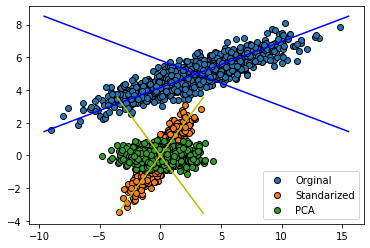

In [19]:
plt.scatter(X[0],X[1],label = 'Orginal',edgecolor = 'black')
plt.plot([X_mean[0] - 5 * V[0, 0] * X_std[0], X_mean[0] + 5 * V[0,0] * X_std[0]], [X_mean[1] - 5 * V[1,0] * X_std[1], X_mean[1] + 5 * V[1,0] * X_std[1]],c = 'b')
plt.plot([X_mean[0] - 5 * V[0, 1] * X_std[0], X_mean[0] + 5 * V[0,1] * X_std[0]], [X_mean[1] - 5 * V[1,1] * X_std[1], X_mean[1] + 5 * V[1,1] * X_std[1]],c='b')
plt.scatter(X0[0],X0[1],label = 'Standarized',edgecolor = 'black')
plt.plot([X_mean0[0] - 5 * V[0, 0] * X_std0[0], X_mean0[0] + 5 * V[0,0] * X_std0[0]], [X_mean0[1] - 5 * V[1,0] * X_std0[1], X_mean0[1] + 5 * V[1,0] * X_std0[1]],c = 'y')
plt.plot([X_mean0[0] - 5 * V[0, 1] * X_std0[0], X_mean0[0] + 5 * V[0,1] * X_std0[0]], [X_mean0[1] - 5 * V[1,1] * X_std0[1], X_mean0[1] + 5 * V[1,1] * X_std0[1]],c='y')
plt.scatter(X_pc2[0],X_pc2[1],label = 'PCA',edgecolor = 'black')
plt.legend(loc = 'lower right')

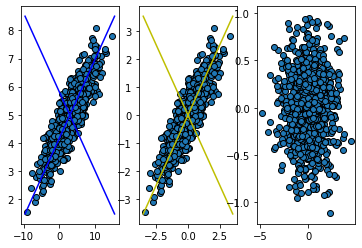

In [20]:
fig, ax = plt.subplots(1,3)
ax[0].scatter(X[0],X[1],label = 'Orginal',edgecolor = 'black')
ax[0].plot([X_mean[0] - 5 * V[0, 0] * X_std[0], X_mean[0] + 5 * V[0,0] * X_std[0]], [X_mean[1] - 5 * V[1,0] * X_std[1], X_mean[1] + 5 * V[1,0] * X_std[1]],c = 'b')
ax[0].plot([X_mean[0] - 5 * V[0, 1] * X_std[0], X_mean[0] + 5 * V[0,1] * X_std[0]], [X_mean[1] - 5 * V[1,1] * X_std[1], X_mean[1] + 5 * V[1,1] * X_std[1]],c='b')
ax[1].scatter(X0[0],X0[1],label = 'Standarized',edgecolor = 'black')
ax[1].plot([X_mean0[0] - 5 * V[0, 0] * X_std0[0], X_mean0[0] + 5 * V[0,0] * X_std0[0]], [X_mean0[1] - 5 * V[1,0] * X_std0[1], X_mean0[1] + 5 * V[1,0] * X_std0[1]],c = 'y')
ax[1].plot([X_mean0[0] - 5 * V[0, 1] * X_std0[0], X_mean0[0] + 5 * V[0,1] * X_std0[0]], [X_mean0[1] - 5 * V[1,1] * X_std0[1], X_mean0[1] + 5 * V[1,1] * X_std0[1]],c='y')
ax[2].scatter(X_pc2[0],X_pc2[1],label = 'PCA',edgecolor = 'black')

In [21]:
print("Orginal")
print_stats(X)
print("Standarized")
print_stats(X0)
print("PCA")
print_stats(X_pc2)

Orginal
Mean: [2.96891441 4.98540128]
Std: [3.54659029 0.99628657]
Covariance matrix:
 [[12.59089358  3.09370398]
 [ 3.09370398  0.99358051]]
Corealation matrix:
 [[1.        0.8746795]
 [0.8746795 1.       ]]

Standarized
Mean: [-9.23705556e-17 -1.17594823e-15]
Std: [1. 1.]
Covariance matrix:
 [[1.001001   0.87555505]
 [0.87555505 1.001001  ]]
Corealation matrix:
 [[1.        0.8746795]
 [0.8746795 1.       ]]

PCA
Mean: [-8.77520279e-16 -7.68718422e-16]
Std: [1.36918936 0.35400636]
Covariance matrix:
 [[1.87655605e+00 2.65386645e-16]
 [2.65386645e-16 1.25445948e-01]]
Corealation matrix:
 [[1.00000000e+00 5.46978146e-16]
 [5.46978146e-16 1.00000000e+00]]



## i)
Powtórz wszystkie powyższe obliczenia dla zestawu danych X składającego się z 1000 wektorów dwuwymiarowych xi = (x1i, x2i)T, dla i = 1, 2, …, 1000, wygenerowanych losowo przy użyciu mieszaniny trzech rozkładów normalnych o średnich [-21, -2], [3, 5], [27, 12], macierzy kowariancji [12, 3; 3, 1] takiej samej dla wszystkich trzech rozkładów oraz wag równych dla wszystkich trzech rozkładów wynoszących 1/3.

In [22]:
N = 1000
X = np.random.randn(2,N)
mu = np.array([[-21,3,27], [-2,5,12]])
mixture = np.random.randint(3, size=N)
mixture = np.array([mu[:,i] for i in mixture])
A = la.cholesky([[12, 3],[3, 1]])
X = np.dot(A,X) + mixture.T
X

array([[-17.39676928,  31.04045909,  32.78716341, ..., -18.46383265,
         32.26450697,   6.67840522],
       [ -1.07276864,  13.87129588,  14.01832668, ...,  -1.10871795,
         13.35009967,   6.15265244]])

In [23]:
X0 = standardize(X)
S = np.cov(X0)
W,V = la.eig(S)
X_pc = (1./np.sqrt(W).reshape(-1,1)) *  np.dot(V.T,X0)
X_mean = np.mean(X,1)
X_std = np.std(X,1)
X_mean0 = np.mean(X0,1)
X_std0 = np.std(X0,1)

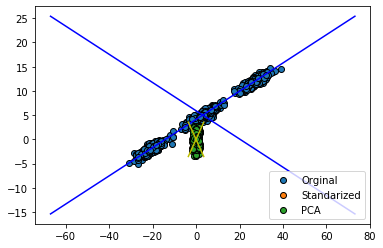

In [24]:
plt.scatter(X[0],X[1],label = 'Orginal',edgecolor = 'black')
plt.plot([X_mean[0] - 5 * V[0, 0] * X_std[0], X_mean[0] + 5 * V[0,0] * X_std[0]], [X_mean[1] - 5 * V[1,0] * X_std[1], X_mean[1] + 5 * V[1,0] * X_std[1]],c = 'b')
plt.plot([X_mean[0] - 5 * V[0, 1] * X_std[0], X_mean[0] + 5 * V[0,1] * X_std[0]], [X_mean[1] - 5 * V[1,1] * X_std[1], X_mean[1] + 5 * V[1,1] * X_std[1]],c='b')
plt.scatter(X0[0],X0[1],label = 'Standarized',edgecolor = 'black')
plt.plot([X_mean0[0] - 5 * V[0, 0] * X_std0[0], X_mean0[0] + 5 * V[0,0] * X_std0[0]], [X_mean0[1] - 5 * V[1,0] * X_std0[1], X_mean0[1] + 5 * V[1,0] * X_std0[1]],c = 'y')
plt.plot([X_mean0[0] - 5 * V[0, 1] * X_std0[0], X_mean0[0] + 5 * V[0,1] * X_std0[0]], [X_mean0[1] - 5 * V[1,1] * X_std0[1], X_mean0[1] + 5 * V[1,1] * X_std0[1]],c='y')
plt.scatter(X_pc[0],X_pc[1],label = 'PCA',edgecolor = 'black')
plt.legend(loc = 'lower right')

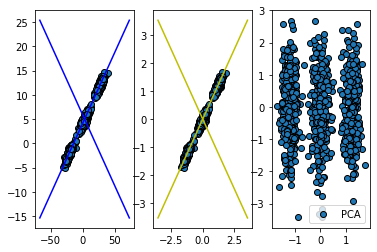

In [25]:
fig, ax = plt.subplots(1,3)
ax[0].scatter(X[0],X[1],label = 'Orginal',edgecolor = 'black')
ax[0].plot([X_mean[0] - 5 * V[0, 0] * X_std[0], X_mean[0] + 5 * V[0,0] * X_std[0]], [X_mean[1] - 5 * V[1,0] * X_std[1], X_mean[1] + 5 * V[1,0] * X_std[1]],c = 'b')
ax[0].plot([X_mean[0] - 5 * V[0, 1] * X_std[0], X_mean[0] + 5 * V[0,1] * X_std[0]], [X_mean[1] - 5 * V[1,1] * X_std[1], X_mean[1] + 5 * V[1,1] * X_std[1]],c='b')
ax[1].scatter(X0[0],X0[1],label = 'Standarized',edgecolor = 'black')
ax[1].plot([X_mean0[0] - 5 * V[0, 0] * X_std0[0], X_mean0[0] + 5 * V[0,0] * X_std0[0]], [X_mean0[1] - 5 * V[1,0] * X_std0[1], X_mean0[1] + 5 * V[1,0] * X_std0[1]],c = 'y')
ax[1].plot([X_mean0[0] - 5 * V[0, 1] * X_std0[0], X_mean0[0] + 5 * V[0,1] * X_std0[0]], [X_mean0[1] - 5 * V[1,1] * X_std0[1], X_mean0[1] + 5 * V[1,1] * X_std0[1]],c='y')
ax[2].scatter(X_pc[0],X_pc[1],label = 'PCA',edgecolor = 'black')
ax[2].legend(loc = 'lower right')

In [26]:
print("Orginal")
print_stats(X)
print("Standarized")
print_stats(X0)
print("PCA")
print_stats(X_pc)

Orginal
Mean: [3.07889232 5.01085453]
Std: [19.79476612  5.77069152]
Covariance matrix:
 [[392.22499072 113.86531087]
 [113.86531087  33.33421481]]
Corealation matrix:
 [[1.         0.99581506]
 [0.99581506 1.        ]]

Standarized
Mean: [-5.32907052e-17 -2.13162821e-17]
Std: [1. 1.]
Covariance matrix:
 [[1.001001   0.99681187]
 [0.99681187 1.001001  ]]
Corealation matrix:
 [[1.         0.99581506]
 [0.99581506 1.        ]]

PCA
Mean: [-3.19744231e-17  4.33431069e-16]
Std: [0.99949987 0.99949987]
Covariance matrix:
 [[1.00000000e+00 1.43584399e-15]
 [1.43584399e-15 1.00000000e+00]]
Corealation matrix:
 [[1.00000000e+00 1.43584399e-15]
 [1.43584399e-15 1.00000000e+00]]



## j)
Powtórz b), c), d) i e) dla zestawu danych IRIS. Zrób dwuwymiarowy rysunek ilustrujący zbiór danych IRIS wykreślając na osi x pierwszą składową główną y1i, a na osi y2i drugą składową główną każdego punktu xi.

In [27]:
iris = datasets.load_iris()
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [28]:
iris0 = standardize(iris.data.T)
S = np.cov(iris0)
W,V = la.eig(S)
W,V = W[:2],V[:,:2]
iris_pc = (1./np.sqrt(W).reshape(-1,1)) *  np.dot(V.T,iris0)
iris_mean = np.mean(iris.data.T,1)
iris_std = np.std(iris.data.T,1)
iris_mean0 = np.mean(iris0,1)
iris_std0 = np.std(iris0,1)

Text(0.5, 1.0, 'PCA for iris dataset')

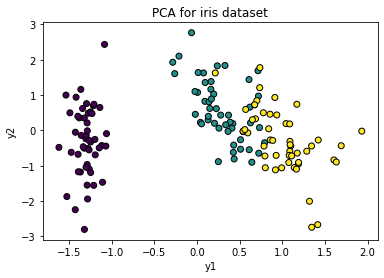

In [31]:
plt.scatter(iris_pc[0],iris_pc[1],c=iris.target,edgecolor='black')
plt.xlabel('y1')
plt.ylabel('y2')
plt.title('PCA for iris dataset')

## k)
Dla zestawu danych IRIS, spróbuj odtworzyć oryginalne punkty danych xi z danych zredukowanych do dwóch składowych głównych, tzn. z dwuwymiarowych punktów [y1i,y2i]T. Policz średniokwadratowy błąd odtworzenia, tzn. sumę kwadratów odległości między
oryginalnym punktem danych a odtworzonym punktem danych.

In [32]:
re_iris = iris_pc * np.sqrt(W).reshape(-1,1)
re_iris = np.dot(V,re_iris)
re_iris *= iris_std.reshape(-1,1)
re_iris += iris_mean.reshape(-1,1)

Text(0.5, 1.0, 'Recreated iris data after PCA')

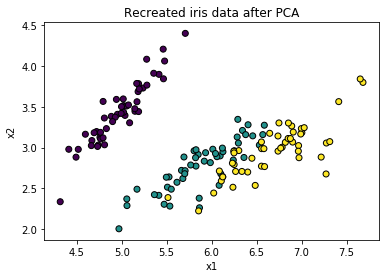

In [33]:
plt.scatter(re_iris[0],re_iris[1],c=iris.target,edgecolor='black')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Recreated iris data after PCA')

In [34]:
np.mean(np.sum(iris.data.T - re_iris,axis=0)**2)

0.023730123344107307

## l)
Jakie znaczenie ma suma wartości własnych macierzy kowariancji S, które zostały użyte do konstrukcji danych zredukowaych.

In [35]:
iris0 = standardize(iris.data.T)
S = np.cov(iris0)
W,V = la.eig(S)
W,V = W[2:],V[:,2:]
iris_pc = (1./np.sqrt(W).reshape(-1,1)) *  np.dot(V.T,iris0)
iris_mean = np.mean(iris.data.T,1)
iris_std = np.std(iris.data.T,1)
iris_mean0 = np.mean(iris0,1)
iris_std0 = np.std(iris0,1)

In [36]:
re_iris = iris_pc * np.sqrt(W).reshape(-1,1)
re_iris = np.dot(V,re_iris)
re_iris *= iris_std.reshape(-1,1)
re_iris += iris_mean.reshape(-1,1)

In [37]:
np.mean(np.sum(iris.data.T - re_iris,axis=0)**2)

9.669105876655893

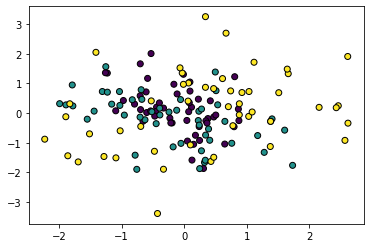

In [38]:
plt.scatter(iris_pc[0],iris_pc[1],c=iris.target,edgecolor='black')

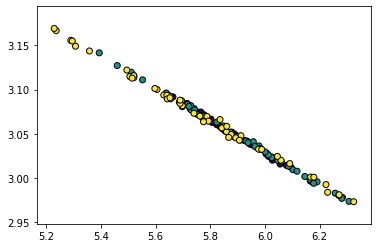

In [39]:
plt.scatter(re_iris[0],re_iris[1],c=iris.target,edgecolor='black')

# Zadanie 2. (2 punkty)
Zapoznaj się z dołączonymi do listy zadań danymi (pochodzącymi z bazy danych AR Face Database1 stworzonej przez prof. Aleixa Martineza z Ohio State University i udostępnionej przez niego na potrzeby naszego wykładu). Przygotowany przeze mnie zbiór danych zawiera odpowiednio przeskalowane zdjęcia twarzy o rozdzielczości 82 x 60 pikseli w 256 odcieniach szarości każdy (zatem zdjęcie twarzy można utożsamić z punktem przestrzeni 82 x 60 = 4920 wymiarowej). Wczytaj pierwszy zestaw danych (zawierający 250 zdjęć – po 5 zdjęć każdej z 50 osób), spróbuj zredukować ich wymiarowość. Dokładnie przeanalizuj wyniki (jak można interpretować uzyskane wektory własne?)

In [41]:
img_train = np.array(pd.read_csv('images_train.csv',header=None))
img_test = np.array(pd.read_csv('images_test.csv',header=None))

In [61]:
img_train[:,1].reshape(82,60)

array([[230.        ,  53.25      ,  38.33333333, ..., 255.        ,
        255.        , 255.        ],
       [255.        , 255.        , 255.        , ..., 119.91666667,
        123.        , 129.08333333],
       [130.91666667, 131.75      , 130.58333333, ...,  91.58333333,
         86.66666667,  85.5       ],
       ...,
       [255.        , 255.        , 255.        , ..., 155.66666667,
        153.41666667, 148.33333333],
       [141.83333333, 135.83333333, 138.16666667, ...,  41.91666667,
         43.16666667,  39.33333333],
       [ 38.75      ,  38.58333333,  34.91666667, ..., 244.25      ,
        244.83333333, 244.58333333]])

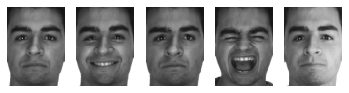

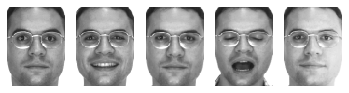

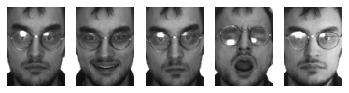

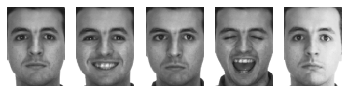

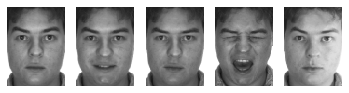

In [73]:
for i in np.random.randint(0,50,5):
    f,ax = plt.subplots(1,5)
    for j in range(5):
        img = img_train[:,i*5 + j].reshape(60,82).T
        ax[j].imshow(img, cmap='gray', vmin=0, vmax=255)
        ax[j].axis('off')

In [106]:
img_mean = np.mean(img_train,1)
img_std = np.std(img_train,1)

In [107]:
img0 = standardize(img_train)
S = np.cov(img0)
W,V = la.eig(S)

In [108]:
img_pc0 = (1./np.sqrt(W).reshape(-1,1)) *  np.dot(V.T,img0)

In [109]:
img_pc = np.real(img_pc0)

# Zadanie 3. (2 punkty)
Zaimplementuj prostą metodę rozpoznawania twarzy:
- wczytane są zdjęcia wzorcowe (5 zdjęć każdej z 50 osób), czyli 250 wektorów
4920-wymiarowych x1, x2, …, x250 ∈ R
4920,
- wiadomo które zdjęcia wzorcowe odpowiadają którym osobom (w zbiorze danych
zdjęcia osób są zapisane kolejno: 5 zdjęć osoby nr 1, 5 zdjęć osoby nr 2, ..., 5 zdjęć
osoby nr 50), co można określić funkcją osoba(xk) = (k-1) div 5 + 1,
- na wejściu podawane jest zdjęcie nieznanej osoby, czyli wektor 4920 wymiarowy y
∈ R
4920
,
- dla wektora y należy wyznaczyć najbliższy mu wektor xk, dla k = 1, 2, …, 250,
(najbliższy w sensie odległości euklidesowej w R
4920),
- jeżeli odległość między y a xk nie przekracza pewnego ustalonego progu, to można
uznać, że y jest zdjęciem twarzy osoby osoba(xk).
Wczytaj drugi zestaw danych (zawierający 100 zdjęć – po 2 zdjęcia każdej z 50 osób).
Przetestuj na tym zestawie danych efektywność zaimplementowanej metody (zdjęcia
wzorcowe pochodzą z pierwszego zestawu danych, drugi zestaw danych jest używany
tylko do testów). Dokładnie przeanalizuj wyniki.

In [82]:
def classify(train,sample,tol=5000):
    dists = np.sum((train - sample.reshape(-1,1))**2,axis=0)
    min_i = np.argmin(dists)
    if np.sqrt(dists[min_i]) <= tol:
        return min_i // 5
    return np.sqrt(dists[min_i])

In [83]:
def classify_all(train,test):
    dists = -2 * np.dot(test.T, train) + np.sum(train**2,axis=0)
    preds = np.argmin(dists,axis=1) // 5
    return preds

In [84]:
classify_all(img_train,img_test)

array([31, 31, 24,  1, 31, 31, 24, 34, 38, 31,  5,  5, 31, 31, 12, 12, 18,
        8, 29, 29, 29, 29, 32, 32, 31, 31, 24, 32, 32, 32, 18, 18, 31, 31,
       24,  1, 18, 18, 32, 31, 31, 31, 31, 31,  0,  0, 32, 32, 31, 31,  8,
       25, 32, 32, 29, 29, 24, 12, 29, 29, 32, 32, 31, 31, 32, 32, 29, 31,
       32, 32, 31, 31, 32, 32, 37, 37, 31, 31,  0, 32, 29, 46, 31, 31, 21,
       21, 18, 12, 31, 32, 18,  5, 46, 31, 49, 47, 31, 31, 31, 31],
      dtype=int64)

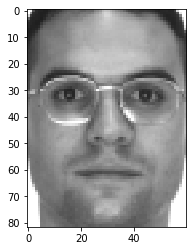

In [87]:
plt.imshow(img_train[:,155].reshape(60,82).T, cmap='gray', vmin=0, vmax=255)

In [88]:
np.mean(classify_all(img_train,img_test) == np.array([i//2 for i in range(100)]))

0.17

# Zadanie 4. (2 punkty)
Zmień metodę rozpoznawania twarzy z poprzedniego zadania w taki sposób, że zamiast
pracować w przestrzeni R
4920 będziemy pracować w przestrzeni mniej wymiarowej
(wyznaczonej przez redukcję wymiarowości pierwszego zestawu danych metodą PCA).
Porównaj tę metodę z metodą oryginalną (używając do testów drugiego zestawu danych).
Dokładnie przeanalizuj wyniki.

Sklearn PCA:

In [115]:
K = 75
pca = PCA(n_components = K, whiten=True)
#standardize train and test
stand_img_train = standardize(img_train)
stand_img_test = standardize(img_test)
# fit pca, trainsform train and test
pc_train = pca.fit_transform(stand_img_train.T).T
pc_test = pca.transform(stand_img_test.T).T
# predict classes using our classifier
preds = classify_all(pc_train,pc_test)
print(f"Sklearn PCA: k={K}, KNN: n=1, acc: {np.mean(preds == np.array([i//2 for i in range(100)]))}")

Sklearn PCA: k=75, KNN: n=1, acc: 1.0


PCA

In [113]:
#standardize test
img0_test = standardize(img_test)
#project test
pc0_test = (1./np.sqrt(W).reshape(-1,1)) *  np.dot(V.T,img0_test)
pc_test = np.real(pc0_test)
#set k
K = 75
# transform train and test
train_pca = img_pc[:K,:]
test_pca = pc_test[:K,:]
# predict classes
preds = classify_all(train_pca,test_pca)
print(f"PCA k={K}, KNN: n=1, acc: {np.mean(preds == np.array([i//2 for i in range(100)]))}")

PCA k=75, KNN: n=1, acc: 1.0


# Zadanie 5. (2 punkty)
Zamiast proponowanej prostej metody rozpoznawania twarzy użyj klasyfikatora KNN.
Porównaj skuteczność klasyfikacji dla różnych k, dla danych oryginalnych i danych
zredukowanych (dla różnej liczby wymiarów). Porównanie zrób metodą cross-validation
dla połączonych obu zestawów danych.

In [116]:
def KNN(train,test,k):
    dists = -2 * np.dot(test.T, train) + np.sum(train**2,axis=0)
    preds = np.argsort(dists,axis=1)[:,:k] // 5
    return mode(preds,axis=1)[0].ravel()

In [117]:
np.mean(KNN(train_pca,test_pca,1) == np.array([i//2 for i in range(100)]))

1.0

In [118]:
def KNN_df(train_df,test_df,k):
    train_target = np.array(train_df.index) // 7
    train = np.array(train_df).T
    test_target = np.array(test_df.index) // 7
    test = np.array(test_df).T
    dists = -2 * np.dot(test.T, train) + np.sum(train**2,axis=0)
    preds = np.argsort(dists,axis=1)[:,:k]
    preds = np.array([[train_target[i] for i in line] for line in preds])
    preds = mode(preds,axis=1)[0].ravel()
    return np.mean(preds == test_target)

In [119]:
def PCA_df(train_df,test_df,K):
    train_pca,test_pca = train_df.copy(),test_df.copy()
    train = np.array(train_df).T
    test = np.array(test_df).T
    train0 = standardize(train)
    test0 = standardize(test)
    S = np.cov(train0)
    W,V = la.eig(S)
    train_pc = np.real((1./np.sqrt(W).reshape(-1,1)) *  np.dot(V.T,train0))
    test_pc = np.real((1./np.sqrt(W).reshape(-1,1)) *  np.dot(V.T,test0))
    train_pca.loc[train_pca.index] = train_pc.T
    test_pca.loc[test_pca.index] = test_pc.T
    return train_pca.loc[:,:K],test_pca.loc[:,:K]

In [120]:
merged_ = np.array([img_train[:,(i//7)*5 + i%5] if i%7<5 else img_test[:,(i//7)*2 + i%2] for i in range(350)])

In [121]:
org_df = pd.DataFrame(merged_)
kfold_idx = np.arange(350)
np.random.shuffle(kfold_idx)
K = 75
k_f = 10
n_s = 350 // k_f
res_ = {}
res_pca_ = {}
ks = [1,3,5,7]
for k in ks:
    res_[k] = []
    res_pca_[k] = []
for i in range(k_f):
    test_idx = kfold_idx[i*n_s:(i+1)*n_s]
    train_idx = np.array(set(np.arange(350)) - set(test_idx))
    train_df = org_df.loc[train_idx]
    test_df = org_df.loc[test_idx]
    train_pca_df,test_pca_df = PCA_df(train_df,test_df,K)
    for k in ks:
        res_pca_[k].append(KNN_df(train_pca_df,test_pca_df,k))
        res_[k].append(KNN_df(train_df,test_df,k))
for k,v in res_.items():
    print(f"Orginal data, k = {k}, mean acc = {np.mean(np.array(v))}")
print()
print(f"Dimension reduced from 4920 to {K}")
for k,v in res_pca_.items():
    print(f"PCA data, k = {k}, mean acc = {np.mean(np.array(v))}")

Orginal data, k = 1, mean acc = 0.48571428571428565
Orginal data, k = 3, mean acc = 0.40857142857142864
Orginal data, k = 5, mean acc = 0.3371428571428571
Orginal data, k = 7, mean acc = 0.28285714285714286

Dimension reduced from 4920 to 75
PCA data, k = 1, mean acc = 0.8800000000000001
PCA data, k = 3, mean acc = 0.8514285714285714
PCA data, k = 5, mean acc = 0.8428571428571429
PCA data, k = 7, mean acc = 0.8085714285714287


# Zadanie 6. (4 punkty)
W pakiecie SciKit do Pythona dostępnych jest kilka popularnych metod redukcji
wymiarowości i manifold learning (czyli metod wyznaczania rozmaitości różniczkowalnej,
na której znajdują się rozpatrywane dane). Zapoznaj się z nimi wykonując skrypt
umieszczony w materiałach do wykładu. Sprawdź jaki wpływ na działanie tych metod mają
ich parametry

In [2]:
def plot_digits(X, y):
    X = (X - np.min(X, 0)) / (np.max(X, 0) - np.min(X, 0))

    plt.figure(figsize=(12, 9))

    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]), color=plt.cm.Set1(0.1*y[i]), fontdict={'weight':'bold', 'size':8})

    plt.xticks([])
    plt.yticks([])
    plt.show()

## Loading data

In [3]:
digits = datasets.load_digits()
X = digits.data
y = digits.target
N, d = X.shape

In [4]:
X_df = pd.DataFrame(X)
X_df['target'] = digits.target
X_df

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


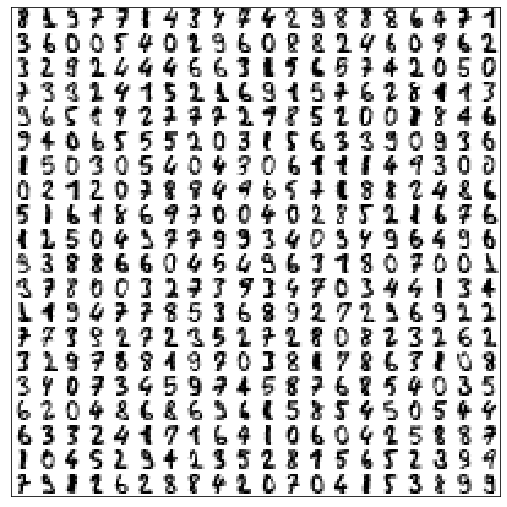

In [5]:
M = 20
image = np.zeros((10 * M, 10 * M))
order = np.random.permutation(N)
for i in range(M):
    for j in range(M):
        image[10*i+1:10*i+9, 10*j+1:10*j+9] = X[order[i*M+j], :].reshape((8, 8))

plt.figure(figsize=(9, 9))
plt.imshow(image, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.show()

In [8]:
y

array([0, 1, 2, ..., 8, 9, 8])

## Random projection

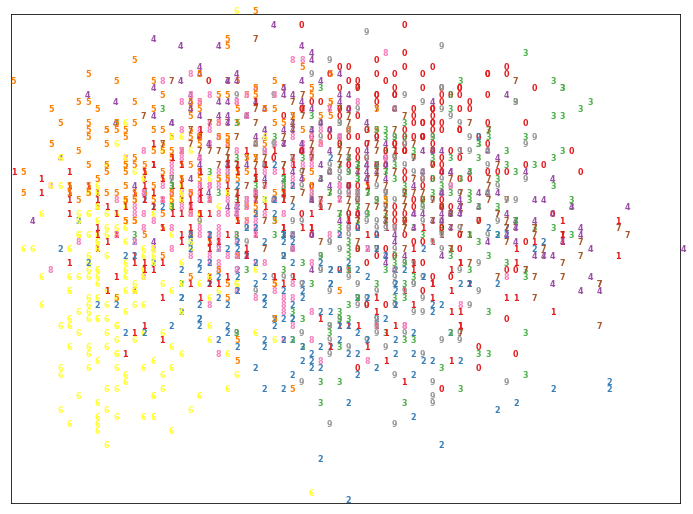

In [127]:
X_projected = random_projection.SparseRandomProjection(n_components=2).fit_transform(X)
plot_digits(X_projected, digits.target)

## PCA
Principal Component Analysis

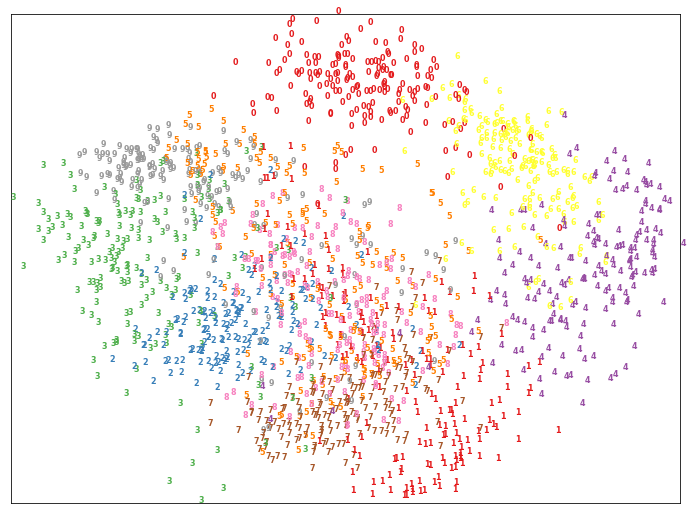

In [128]:
X_pca = decomposition.PCA(n_components=2,whiten=True).fit_transform(X)
plot_digits(X_pca, digits.target)

## KCPA
Kernel Principal Component Analysis

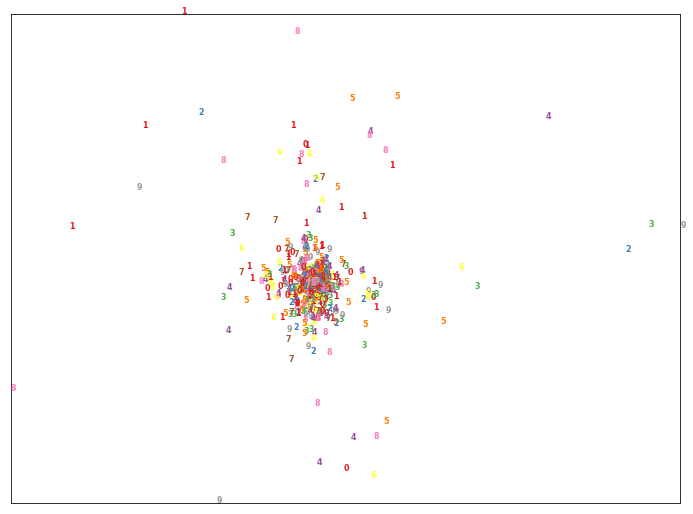

In [129]:
X_kpca = decomposition.KernelPCA(n_components=2, kernel="rbf", gamma=10).fit_transform(X)
plot_digits(X_kpca, digits.target)

## Isomap

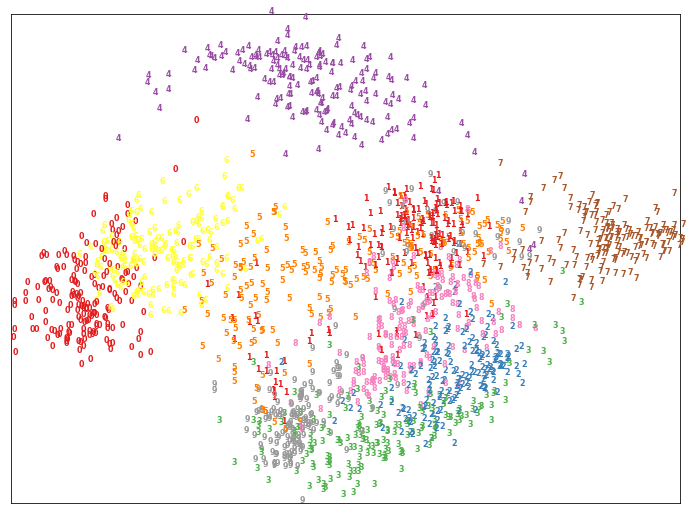

In [130]:
X_iso = manifold.Isomap(20, n_components=2).fit_transform(X)
plot_digits(X_iso, digits.target)

## LLE
Locally Linear Embedding

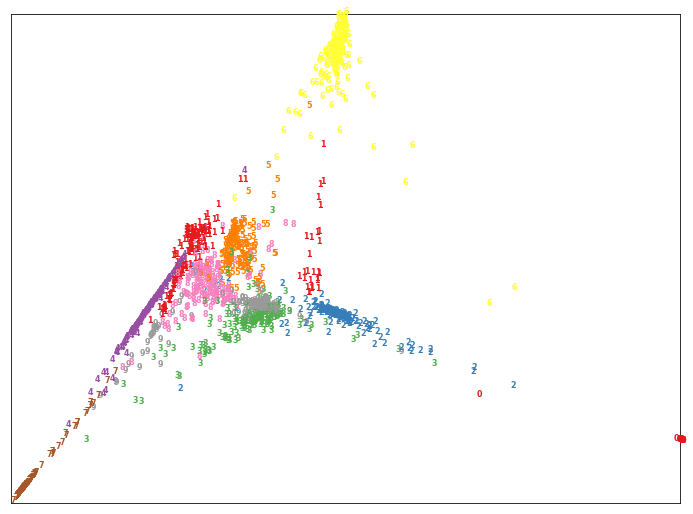

In [131]:
X_lle = manifold.LocallyLinearEmbedding(12, n_components=2).fit_transform(X)
plot_digits(X_lle, digits.target)

## MDS
Multidimensional Scaling

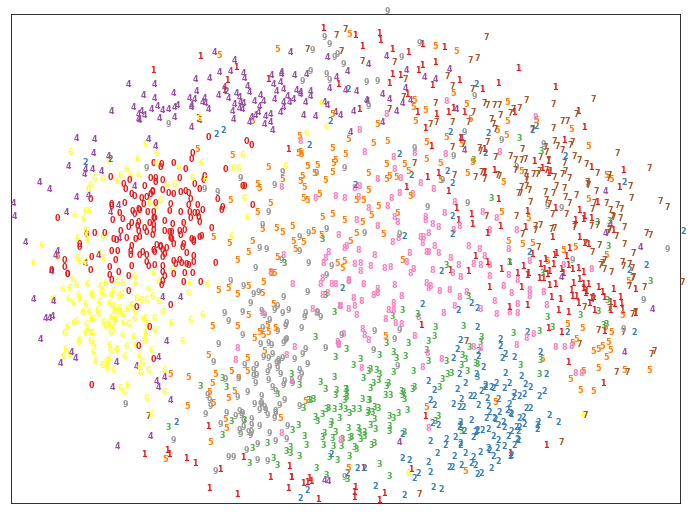

In [132]:
X_mds = manifold.MDS(n_components=2, n_init=1, max_iter=100, metric=True).fit_transform(X)
plot_digits(X_mds, digits.target)

## t-SNE
t-distributed Stochastic Neighbor Embedding

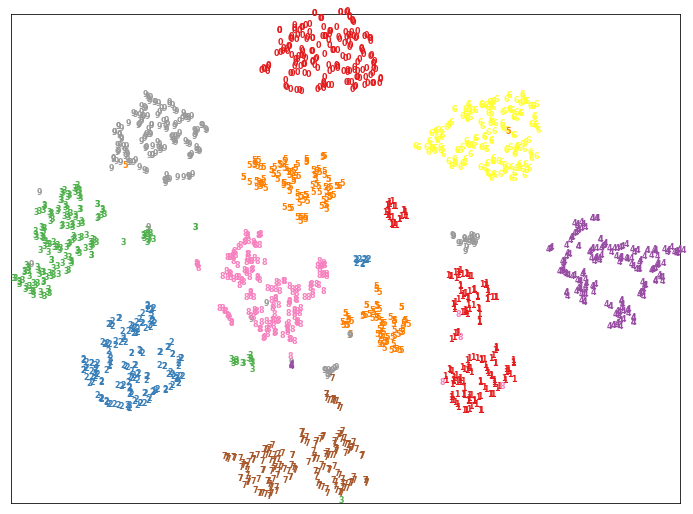

In [133]:
X_tsne = manifold.TSNE(n_components=2, init='pca', perplexity=10).fit_transform(X)
plot_digits(X_tsne, digits.target)

# Zadanie 7. (3 punkty)
Porównaj skuteczność klasyfikatora KNN działającego na oryginalnym zestawie danych
zawierającym obrazy cyfr pisanych ręcznie (użytym w skrypcie z poprzedniego zadania)
ze skutecznością klasyfikatorów KNN działających na zestawach danych zredukowanych
do dwóch wymiarów za pomocą metod PCA, KPCA, Isomap, LLE, MDS, t-SNE.

In [134]:
kf = KFold(n_splits = 10, shuffle = True)

In [135]:
def KNN_digits(train,test,train_target,test_target,k):
    dists = -2 * np.dot(test, train.T) + np.sum(train.T**2,axis=0)
    preds = np.argsort(dists,axis=1)[:,:k]
    preds = np.array([[train_target[i] for i in line] for line in preds])
    preds = mode(preds,axis=1)[0].ravel()
    return np.mean(preds == test_target)

In [9]:
splits = kf.split(X_df)
ks = [1,3,5,7,9,11,13,15,17,19,21]
res = {
    'org' : {},
    'pca' : {},
    'kpca' : {},
    'isomap' : {},
    'lle' : {},
    'mds' : {},
    'tsne' : {}
}
for key,v in res.items():
    for k in ks:
        res[key][k] = []
for train_idx,test_idx in splits:
    train,test = X_df.loc[train_idx],X_df.loc[test_idx]
    train_test = np.array(X_df.drop(['target'],axis=1))
    train_target,train = np.array(train['target']),np.array(train.drop(['target'],axis=1))
    test_target,test = np.array(test['target']),np.array(test.drop(['target'],axis=1))
    
    PCA = decomposition.PCA(n_components=2,whiten=True)
    pca_train = PCA.fit_transform(train)
    pca_test = PCA.transform(test)
    
    KPCA = decomposition.KernelPCA(n_components=2, kernel="rbf", gamma=10)
    kpca_train = KPCA.fit_transform(train)
    kpca_test = KPCA.transform(test)
    
    ISO = manifold.Isomap(20, n_components=2)
    iso_train = ISO.fit_transform(train)
    iso_test = ISO.transform(test)
    
    LLE = manifold.LocallyLinearEmbedding(12, n_components=2)
    lle_train = LLE.fit_transform(train)
    lle_test = LLE.transform(test)
 
    MDS = manifold.MDS(n_components=2, n_init=1, max_iter=100, metric=True)
    mds_merge = pd.DataFrame(MDS.fit_transform(train_test))
    mds_train,mds_test = np.array(mds_merge.loc[train_idx]),np.array(mds_merge.loc[test_idx])
#     mds_train = MDS.fit_transform(train)
#     mds_test = MDS.fit_transform(test)

    tSNE = manifold.TSNE(n_components=2, init='pca', perplexity=10)
    tsne_merge = pd.DataFrame(tSNE.fit_transform(train_test))
    tsne_train,tsne_test = np.array(tsne_merge.loc[train_idx]),np.array(tsne_merge.loc[test_idx])
#     tsne_train = tSNE.fit_transform(train)
#     tsne_test = tSNE.fit_transform(test)
    
    for k in ks:
        res['org'][k].append(KNN_digits(train,test,train_target,test_target,k))
        res['pca'][k].append(KNN_digits(pca_train,pca_test,train_target,test_target,k))
        res['kpca'][k].append(KNN_digits(kpca_train,kpca_test,train_target,test_target,k))
        res['isomap'][k].append(KNN_digits(iso_train,iso_test,train_target,test_target,k))
        res['lle'][k].append(KNN_digits(lle_train,lle_test,train_target,test_target,k))
        res['mds'][k].append(KNN_digits(mds_train,mds_test,train_target,test_target,k))
        res['tsne'][k].append(KNN_digits(tsne_train,tsne_test,train_target,test_target,k))

In [10]:
res

{'org': {1: [0.9888888888888889,
   0.9888888888888889,
   0.9833333333333333,
   0.9777777777777777,
   0.9888888888888889,
   0.9833333333333333,
   0.9944444444444445,
   1.0,
   0.9832402234636871,
   0.9888268156424581],
  3: [0.9833333333333333,
   0.9777777777777777,
   0.9888888888888889,
   0.9833333333333333,
   0.9833333333333333,
   0.9944444444444445,
   0.9944444444444445,
   1.0,
   0.9832402234636871,
   0.9832402234636871],
  5: [0.9777777777777777,
   0.9833333333333333,
   0.9888888888888889,
   0.9833333333333333,
   0.9833333333333333,
   0.9888888888888889,
   0.9888888888888889,
   0.994413407821229,
   0.9832402234636871,
   0.9888268156424581],
  7: [0.9722222222222222,
   0.9833333333333333,
   0.9833333333333333,
   0.9833333333333333,
   0.9722222222222222,
   0.9833333333333333,
   0.9944444444444445,
   0.9888268156424581,
   0.9832402234636871,
   0.9888268156424581],
  9: [0.9777777777777777,
   0.9833333333333333,
   0.9777777777777777,
   0.98888888888

In [11]:
data = []
for d in res.values():
    for l in d.values():
        data.append(l)
res_df = pd.DataFrame(np.array(data).ravel())
res_df['method'] = ['org'] * 110 + ['pca'] * 110 + ['kpca'] * 110 + ['isomap'] * 110 + ['lle'] * 110 + ['mds'] * 110 + ['tsne'] * 110
res_df['k'] = [2*i + 1 for j in range(7) for i in range(11) for k in range(10)]
res_df.columns = ['acc','method','k']
res_df

,acc,method,k
0,0.988889,org,1
1,0.988889,org,1
2,0.983333,org,1
3,0.977778,org,1
4,0.988889,org,1
...,...,...,...
765,0.988889,tsne,21
766,0.988889,tsne,21
767,0.994413,tsne,21
768,0.983240,tsne,21


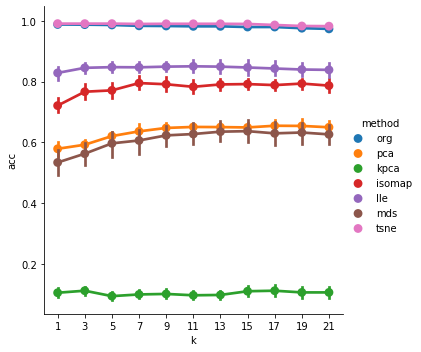

In [13]:
g = sns.catplot(x="k", y="acc", hue="method",kind="point", data=res_df)